In [61]:
import pandas as pd
import matplotlib.pyplot as plt
# 读取 Excel 文件
file_path = '附件一（训练集）.xlsx'  # 相对路径
df1 = pd.read_excel(file_path)

# 选择第五到第1029列（注意索引从0开始）
selected_columns = df1.iloc[:, 4:]

# 显示结果
print(f"筛选特征列：\n", selected_columns)


# 训练标签
labeles = df1["励磁波形"]
print(labeles)
print("标签", labeles.shape)



筛选特征列：
       0（磁通密度B，T）         1         2         3         4         5         6  \
0       0.000213  0.000389  0.000566  0.000743  0.000919  0.001096  0.001272   
1      -0.000551 -0.000358 -0.000165  0.000028  0.000221  0.000413  0.000605   
2      -0.003780 -0.003564 -0.003349 -0.003134 -0.002919 -0.002704 -0.002488   
3      -0.000511 -0.000267 -0.000023  0.000222  0.000466  0.000711  0.000955   
4       0.000458  0.000732  0.001007  0.001281  0.001555  0.001830  0.002104   
...          ...       ...       ...       ...       ...       ...       ...   
3395   -0.014217 -0.013898 -0.013582 -0.013266 -0.012951 -0.012634 -0.012318   
3396   -0.017910 -0.017508 -0.017108 -0.016711 -0.016312 -0.015912 -0.015514   
3397   -0.020028 -0.019578 -0.019130 -0.018684 -0.018237 -0.017790 -0.017343   
3398   -0.027652 -0.027021 -0.026392 -0.025764 -0.025138 -0.024513 -0.023888   
3399   -0.030905 -0.030196 -0.029490 -0.028785 -0.028082 -0.027380 -0.026679   

             7         8       

In [62]:
from utils import get_mean, max, min, get_labels, get_std, labels


labeles = get_labels(labeles)
labeles

# labeles_encoder = label_encoder(labeles)
# df['waveform'] = labeles_encoder
# df['waveform']

,三角波,梯形波,正弦波
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
3395,False,True,False
3396,False,True,False
3397,False,True,False
3398,False,True,False


In [63]:
# 随机森林
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 特征
mean = get_mean(selected_columns)
std = get_std(selected_columns)
max_values = max(selected_columns)
min_values = min(selected_columns)

#标签
labeles_one_hot = get_labels(labeles)


# 将特征组合成一个二维 NumPy 数组
X = np.column_stack((max_values, std))
# X = std.reshape(-1, 1)            仅使用一个特征
# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, labeles_one_hot, test_size=0.2, random_state=42)

#训练模型
rf.fit(X_train, y_train)

# 评估模型
accuracy = rf.score(X_test, y_test)
print(f"附件一测试集模型准确率: {accuracy:.2f}")
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


附件一测试集模型准确率: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.98      0.99       170
           2       1.00      1.00      1.00       243

   micro avg       0.99      0.99      0.99       680
   macro avg       1.00      0.99      0.99       680
weighted avg       0.99      0.99      0.99       680
 samples avg       0.99      0.99      0.99       680



In [64]:
# 使用附件三进行验证
file_path = '附件三（测试集）.xlsx'  # 相对路径
df3 = pd.read_excel(file_path)
labeles_3 = df3["励磁波形"]
selected_columns_3 = df3.iloc[:, 5:]

std3 = get_std(selected_columns_3)
min3_values = min(selected_columns_3)
max3_values = max(selected_columns_3)

X3 = np.column_stack((max3_values, std3))
y3 = get_labels(labeles_3)

print(f"X3的shape:{X3.shape}", end=',')
print(f"y3的shape:{y3.shape}")

print(f"附件三测试样本数：{len(X3)}")

# 在附件3上评估模型
accuracy = rf.score(X3, y3)
print(f"在测试集三上模型准确率: {accuracy:.2f}")
y_pred = rf.predict(X3)
from sklearn.metrics import classification_report
print(classification_report(y3, y_pred))


X3的shape:(400, 2),y3的shape:(400, 3)
附件三测试样本数：400
在测试集三上模型准确率: 0.89
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.98      0.61      0.75       104
           2       0.87      0.99      0.92       143

   micro avg       0.93      0.89      0.91       400
   macro avg       0.95      0.86      0.89       400
weighted avg       0.94      0.89      0.90       400
 samples avg       0.89      0.89      0.89       400



d:\miniforge3\envs\study\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(3400,)
(3400,)


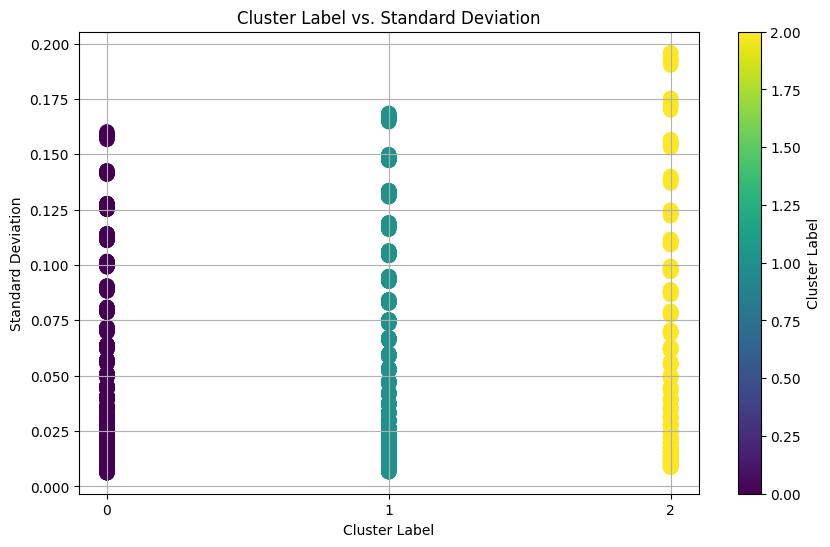

In [65]:
# 绘图，纵轴波类型，横轴标准差

labeles = df1["励磁波形"]
y = labels(labeles)
x = std
print(y.shape)
print(x.shape)

# x = std_values.flatten()  # 转换为一维数组
# y = labels  # 使用聚类标签

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(y, x, c=y, cmap='viridis', s=100)
plt.title('Cluster Label vs. Standard Deviation')
plt.xlabel('Cluster Label')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.xticks(np.unique(y))  # 设置 x 轴刻度为唯一类标签
plt.show()